# Paso 1: Cargar los datos

In [1]:
import sys
import os
import yaml

# Obtener el directorio de trabajo actual (en este caso estás en 'notebooks')
current_dir = os.getcwd()

# Construir la ruta relativa al nivel raíz del proyecto, que está un nivel arriba de 'notebooks'
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Cambiar el directorio de trabajo al nivel raíz del proyecto
os.chdir(project_root)

# Agregar la ruta al directorio 'src' para poder importar las funciones
sys.path.append(os.path.join(project_root, 'src'))

# Importar las funciones desde model_functions.py
from src import model_functions as mf

# Aquí iría el código para correr el modelo o cualquier lógica que estés implementando.


In [3]:
# Cargar el archivo de configuración YAML (puedes cambiar entre simple y complejo)
with open('configs/config_simple_model.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)['model']
config

{'input_size': 57,
 'hidden_layers': [10],
 'output_size': 10,
 'activation_function': 'Tanh',
 'output_activation': 'Sigmoid',
 'loss_function': 'MSELoss',
 'learning_rate': 0.01,
 'optimizer': 'SGD',
 'epochs': 1000}

# 1. Cargar los datos

In [7]:
# 1. Cargar los datos
X, y = mf.load_data()
X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160


In [10]:
y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 2. Dividir los datos en entrenamiento, validación y prueba

In [11]:
X_train, X_val, X_test, y_train, y_val, y_test = mf.split_data(X, y)
print(f"X_train len:  {len(X_train)}")
print(f"X_val len:  { len(X_val)}")
print(f"X_test len: {len(X_test)}")
print(f"y_train len: {len(y_train)}")
print(f"y_val len: {len(y_val)}")
print(f"y_test len: {len(y_test)}")


X_train len:  700
X_val len:  150
X_test len: 150
y_train len: 700
y_val len: 150
y_test len: 150


# 3. Convertir los datos a tensores antes del entrenamiento

In [62]:
X_train_tensor, y_train_tensor = mf.convert_to_tensor(X_train, y_train)
X_val_tensor, y_val_tensor = mf.convert_to_tensor(X_val, y_val)
X_test_tensor, y_test_tensor = mf.convert_to_tensor(X_test, y_test)

print(X_train_tensor[0])

tensor([ 3.0815e-01,  8.9494e-02,  7.8266e-02,  1.6702e-03,  1.6174e+03,
         1.5997e+05,  1.5685e+03,  1.7744e+04,  3.1036e+03,  4.4167e+05,
         1.0059e-01,  2.1495e-03, -2.2992e-04,  4.2113e-03, -8.4454e-04,
         1.4395e-03,  9.5703e+01, -2.1631e+02,  7.6499e+03,  1.3501e+02,
         3.8491e+02, -3.5480e+01,  8.6643e+02,  6.1603e+01,  1.5298e+02,
        -1.4553e+01,  2.1787e+02,  1.1037e+01,  9.4616e+01,  1.2135e+00,
         7.3987e+01,  1.0954e+01,  1.0101e+02, -8.2937e+00,  1.0666e+02,
        -1.4459e+00,  1.1360e+02,  1.2098e-01,  1.1122e+02,  8.2720e+00,
         1.5132e+02, -4.5798e+00,  1.1173e+02,  5.7482e-01,  1.4369e+02,
        -6.0974e+00,  9.9895e+01,  2.0019e-01,  8.1466e+01, -5.9791e-01,
         7.7328e+01, -5.0456e+00,  8.7985e+01, -1.2515e+00,  1.2124e+02,
        -7.2173e+00,  1.4827e+02])


In [61]:
print(y_train_tensor[0])

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


# 4. Crear el modelo


In [19]:
with open('configs/config_complex_model.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)['model']
config

{'input_size': 57,
 'hidden_layers': [30, 15],
 'output_size': 10,
 'activation_function': 'Tanh',
 'output_activation': 'Sigmoid',
 'loss_function': 'MSELoss',
 'learning_rate': 0.01,
 'optimizer': 'SGD',
 'epochs': 1000}

In [20]:
modelo = mf.build_model(config)

### Model details

In [21]:
print(modelo)

Sequential(
  (0): Linear(in_features=57, out_features=30, bias=True)
  (1): Tanh()
  (2): Linear(in_features=30, out_features=15, bias=True)
  (3): Tanh()
  (4): Linear(in_features=15, out_features=10, bias=True)
  (5): Sigmoid()
)


In [22]:
from torchsummary import summary

summary(modelo, (config['input_size'],))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           1,740
              Tanh-2                   [-1, 30]               0
            Linear-3                   [-1, 15]             465
              Tanh-4                   [-1, 15]               0
            Linear-5                   [-1, 10]             160
           Sigmoid-6                   [-1, 10]               0
Total params: 2,365
Trainable params: 2,365
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [117]:
# Another approach to define the model
import torch.nn as nn


model = nn.Sequential(
    nn.Linear(config['input_size'], 256),
    nn.BatchNorm1d(256),
    nn.Tanh(),
    nn.Dropout(0.2),

    nn.Linear(256, 128),
    nn.BatchNorm1d(128),
    nn.Dropout(0.2),

    nn.Linear(128, 64),
    nn.BatchNorm1d(64),
    nn.Dropout(0.2),

    nn.Linear(64, config['output_size']),
    nn.Sigmoid()
)

# Print details
summary(model, (config['input_size'],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]          14,848
       BatchNorm1d-2                  [-1, 256]             512
              Tanh-3                  [-1, 256]               0
           Dropout-4                  [-1, 256]               0
            Linear-5                  [-1, 128]          32,896
       BatchNorm1d-6                  [-1, 128]             256
           Dropout-7                  [-1, 128]               0
            Linear-8                   [-1, 64]           8,256
       BatchNorm1d-9                   [-1, 64]             128
          Dropout-10                   [-1, 64]               0
           Linear-11                   [-1, 10]             650
          Sigmoid-12                   [-1, 10]               0
Total params: 57,546
Trainable params: 57,546
Non-trainable params: 0
---------------------------------

# 5. Entrenar el modelo


Epoch [10/1000], Loss Entrenamiento: 0.2597
Epoch [20/1000], Loss Entrenamiento: 0.2545
Epoch [30/1000], Loss Entrenamiento: 0.2495
Epoch [40/1000], Loss Entrenamiento: 0.2447
Epoch [50/1000], Loss Entrenamiento: 0.2400
Epoch [60/1000], Loss Entrenamiento: 0.2355
Epoch [70/1000], Loss Entrenamiento: 0.2312
Epoch [80/1000], Loss Entrenamiento: 0.2270
Epoch [90/1000], Loss Entrenamiento: 0.2231
Epoch [100/1000], Loss Entrenamiento: 0.2193
Epoch [110/1000], Loss Entrenamiento: 0.2156
Epoch [120/1000], Loss Entrenamiento: 0.2122
Epoch [130/1000], Loss Entrenamiento: 0.2088
Epoch [140/1000], Loss Entrenamiento: 0.2056
Epoch [150/1000], Loss Entrenamiento: 0.2026
Epoch [160/1000], Loss Entrenamiento: 0.1996
Epoch [170/1000], Loss Entrenamiento: 0.1968
Epoch [180/1000], Loss Entrenamiento: 0.1941
Epoch [190/1000], Loss Entrenamiento: 0.1915
Epoch [200/1000], Loss Entrenamiento: 0.1890
Epoch [210/1000], Loss Entrenamiento: 0.1866
Epoch [220/1000], Loss Entrenamiento: 0.1843
Epoch [230/1000], L

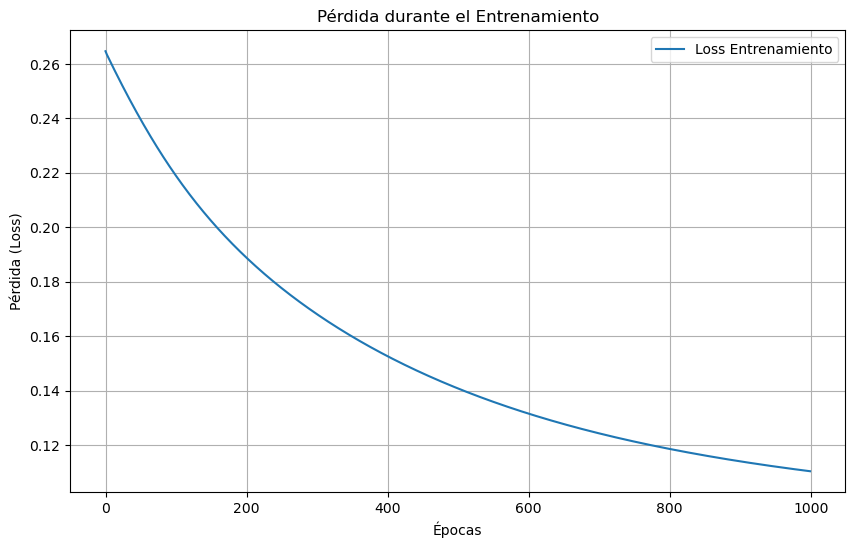

In [37]:
modelo_entrenado = mf.train_model(modelo, X_train_tensor, y_train_tensor, config)

### Training details

In [94]:
config

{'input_size': 57,
 'hidden_layers': [30, 15],
 'output_size': 10,
 'activation_function': 'Tanh',
 'output_activation': 'Sigmoid',
 'loss_function': 'MSELoss',
 'learning_rate': 0.01,
 'optimizer': 'SGD',
 'epochs': 1000}

In [109]:
config['epochs'] = 500

In [86]:
import torch
import matplotlib.pyplot as plt
import time

# Función para calcular la precisión
def calculate_accuracy(y_pred, y_true):
    # Obtener las predicciones de clase
    _, predicted = torch.max(y_pred, 1)
    
    # Calcular el número de predicciones correctas
    correct = (predicted == y_true).sum().item()
    
    # Calcular la precisión
    accuracy = correct / y_true.size(0)
    return accuracy


def train_model_v2(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, config):
    """Entrenar el modelo y visualizar las métricas durante el entrenamiento"""
    # Convertir etiquetas de one-hot a índices de clase
    y_train_tensor = torch.argmax(y_train_tensor, dim=1)  # Convierte [700, 10] a [700]
    y_test_tensor = torch.argmax(y_test_tensor, dim=1)    # Convierte [700, 10] a [700]

    criterion = nn.CrossEntropyLoss()  # Puedes usar get_loss_function(config['loss_function']) si ya tienes una función
    optimizer = torch.optim.SGD(model.parameters(), lr=config['learning_rate']) if config['optimizer'] == 'SGD' else torch.optim.Adam(model.parameters(), lr=config['learning_rate'])
    
    epochs = config['epochs']
    
    # Historial para almacenar métricas
    loss_train_history = []
    accuracy_train_history = []
    loss_test_history = []
    accuracy_test_history = []
    time_per_epoch = []

    for epoch in range(epochs):
        start_time = time.time()

        # Forward pass en entrenamiento
        model.train()
        y_train_pred = model(X_train_tensor)
        loss_train = criterion(y_train_pred, y_train_tensor)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        # Calcular precisión de entrenamiento
        accuracy_train = calculate_accuracy(y_train_pred, y_train_tensor)
        
        # Evaluar en el conjunto de prueba
        model.eval()
        with torch.no_grad():
            y_test_pred = model(X_test_tensor)
            loss_test = criterion(y_test_pred, y_test_tensor)
            accuracy_test = calculate_accuracy(y_test_pred, y_test_tensor)
        
        # Almacenar las métricas
        loss_train_history.append(loss_train.item())
        accuracy_train_history.append(accuracy_train)
        loss_test_history.append(loss_test.item())
        accuracy_test_history.append(accuracy_test)

        # Calcular el tiempo que tomó la época
        epoch_duration = time.time() - start_time
        time_per_epoch.append(epoch_duration)

        # Mostrar el progreso cada 50 épocas
        if (epoch + 1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss Entrenamiento: {loss_train.item():.4f}, Loss Prueba: {loss_test.item():.4f}, Precisión Entrenamiento: {accuracy_train:.4f}, Precisión Prueba: {accuracy_test:.4f}, Tiempo: {epoch_duration:.2f} segundos')

    # Graficar las métricas
    plt.figure(figsize=(12, 8))

    # Gráfico de la pérdida
    plt.subplot(2, 1, 1)
    plt.plot(loss_train_history, label='Loss Entrenamiento')
    plt.plot(loss_test_history, label='Loss Prueba', linestyle='--')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida (Loss)')
    plt.title('Pérdida durante el Entrenamiento y Prueba')
    plt.legend()
    plt.grid(True)

    # Gráfico de la precisión
    plt.subplot(2, 1, 2)
    plt.plot(accuracy_train_history, label='Accuracy Entrenamiento')
    plt.plot(accuracy_test_history, label='Accuracy Prueba', linestyle='--')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión (Accuracy)')
    plt.title('Precisión durante el Entrenamiento y Prueba')
    plt.legend()
    plt.grid(True)

    # Mostrar ambos gráficos
    plt.tight_layout()
    plt.show()

    return model




In [41]:
def evaluate_model_v2(model, X_test_tensor, y_test_tensor, config):
    """Evaluar el modelo en el conjunto de prueba con métricas detalladas"""
    criterion = mf.get_loss_function(config['loss_function'])
    model.eval()
    
    # Inicializar el contador de correctos y la pérdida
    total_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        loss_test = criterion(y_test_pred, y_test_tensor)
        total_loss += loss_test.item()
        
        # Calcular precisión
        _, predicted = torch.max(y_test_pred, 1)
        correct = (predicted == torch.argmax(y_test_tensor, 1)).sum().item()
        total = y_test_tensor.size(0)
        accuracy = correct / total
    
    print(f'Loss en el conjunto de prueba: {total_loss:.4f}')
    print(f'Precisión en el conjunto de prueba: {accuracy*100:.2f}%')

    # Devolver las métricas para posible uso futuro
    return total_loss, accuracy



Epoch [50/500], Loss Entrenamiento: 2.1826, Loss Prueba: 2.2163, Precisión Entrenamiento: 0.2571, Precisión Prueba: 0.1600, Tiempo: 0.10 segundos
Epoch [100/500], Loss Entrenamiento: 2.1677, Loss Prueba: 2.2006, Precisión Entrenamiento: 0.2314, Precisión Prueba: 0.1667, Tiempo: 0.09 segundos
Epoch [150/500], Loss Entrenamiento: 2.1564, Loss Prueba: 2.1920, Precisión Entrenamiento: 0.2471, Precisión Prueba: 0.1733, Tiempo: 0.12 segundos
Epoch [200/500], Loss Entrenamiento: 2.1393, Loss Prueba: 2.1846, Precisión Entrenamiento: 0.2600, Precisión Prueba: 0.1933, Tiempo: 0.10 segundos
Epoch [250/500], Loss Entrenamiento: 2.1350, Loss Prueba: 2.1800, Precisión Entrenamiento: 0.2529, Precisión Prueba: 0.2000, Tiempo: 0.10 segundos
Epoch [300/500], Loss Entrenamiento: 2.1250, Loss Prueba: 2.1758, Precisión Entrenamiento: 0.2586, Precisión Prueba: 0.2000, Tiempo: 0.11 segundos
Epoch [350/500], Loss Entrenamiento: 2.1221, Loss Prueba: 2.1733, Precisión Entrenamiento: 0.2629, Precisión Prueba: 0.

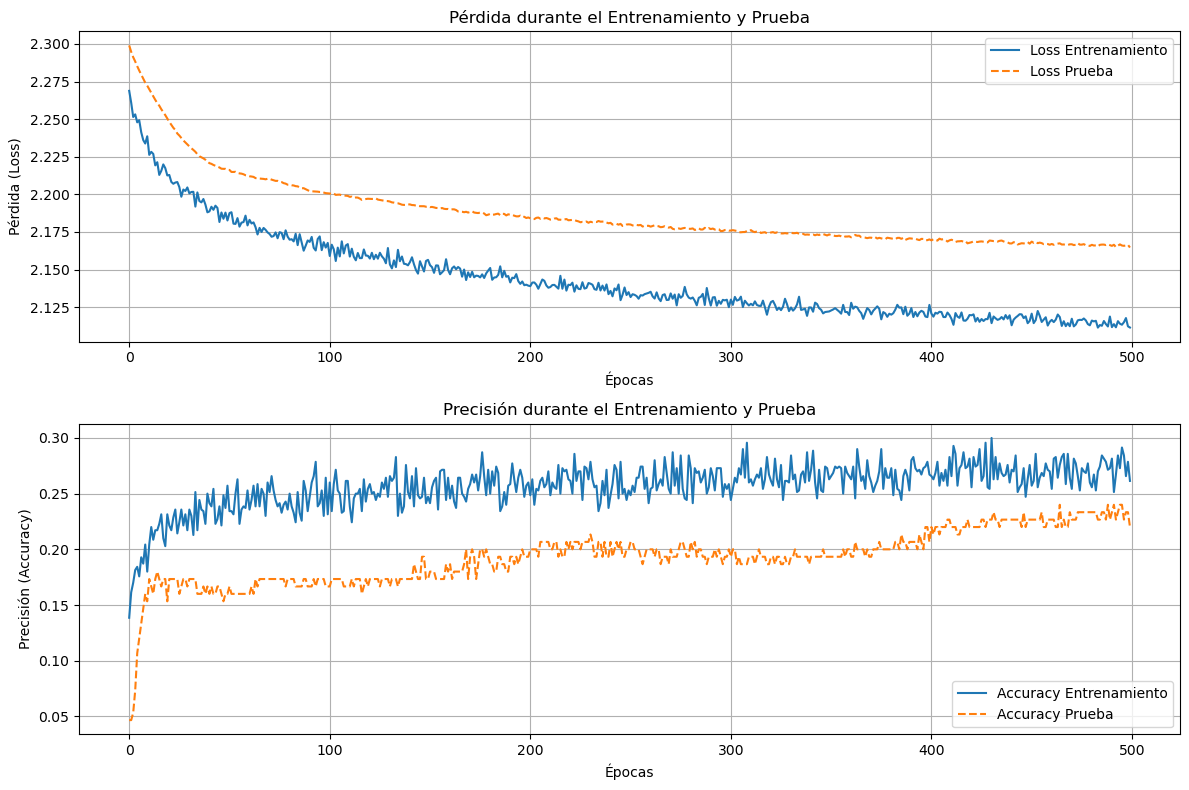

In [118]:
trained_model = train_model_v2(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, config)

# 6. Evaluar el modelo en el conjunto de prueba

In [13]:
mf.evaluate_model(modelo_entrenado, X_test_tensor, y_test_tensor, config)

Loss en el conjunto de prueba: 0.1159


### Alternativa

In [119]:
evaluate_model_v2(model, X_val_tensor, y_val_tensor, config)

Loss en el conjunto de prueba: 0.2925
Precisión en el conjunto de prueba: 24.67%


(0.29249775409698486, 0.24666666666666667)

In [121]:
from sklearn.metrics import classification_report


def final_evaluation(model, X_val_tensor, y_val_tensor):
    """Evaluar el modelo en el conjunto de validación y generar el reporte de clasificación"""
    
    # Convertir etiquetas de one-hot a índices de clase si es necesario
    y_val_tensor = torch.argmax(y_val_tensor, dim=1)  # Asegúrate de que no esté en formato one-hot

    # Listas para almacenar predicciones y etiquetas reales
    y_pred = []
    y_true = []
    
    # Poner el modelo en modo de evaluación
    model.eval()
    
    with torch.no_grad():
        # Hacer predicciones en el conjunto de validación/prueba
        for i in range(len(X_val_tensor)):
            inputs = X_val_tensor[i].unsqueeze(0)  # Extraer una muestra de validación
            labels = y_val_tensor[i].unsqueeze(0)  # Etiqueta correspondiente
            outputs = model(inputs)  # Obtener las predicciones del modelo
            
            # Obtener la clase predicha (índice del valor más alto)
            _, predicted = torch.max(outputs.data, 1)
            
            # Almacenar las predicciones y las etiquetas reales
            y_pred.extend(predicted.tolist())
            y_true.extend(labels.tolist())
    
    # Generar el reporte de clasificación
    print(classification_report(y_true, y_pred))


final_evaluation(model, X_val_tensor, y_val_tensor)



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.16      0.75      0.26         8
           2       0.33      0.23      0.27        13
           3       0.00      0.00      0.00        17
           4       0.50      0.07      0.12        15
           5       0.22      0.12      0.16        16
           6       0.31      0.62      0.42        16
           7       0.32      0.67      0.43        15
           8       0.24      0.45      0.31        11
           9       0.00      0.00      0.00        20

    accuracy                           0.25       150
   macro avg       0.21      0.29      0.20       150
weighted avg       0.19      0.25      0.18       150



c:\Users\josue\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\josue\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\josue\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7. Guardar el modelo entrenado


In [14]:
mf.save_model(modelo_entrenado)


Modelo guardado en models/model_final.pth
